In [1]:
! pip install numpy
! pip install pandas
! pip install scikit-learn
! pip install matplotlib
! pip install nltk

In [37]:
! pip install requests nlpaug

In [3]:
! mkdir -p /your/home/tmp
! TMPDIR=/your/home/tmp pip install torch

  Using cached torch-2.7.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (29 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.6.77-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.6.77-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.6.80-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.5.1.17-py3-none-manylinux_2_28_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.6.4.1-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.3.0.4-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.7.77-py3-none-manyl

In [3]:
! pip install textattack

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [2]:
nltk.download('all')

[nltk_data] Error loading all: <urlopen error [Errno -2] Name or
[nltk_data]     service not known>


False

In [3]:
from textattack.augmentation import WordNetAugmenter

/run/media/aadimprajapati/New Volume/fnclick/python/sentiment-analysis-social-media/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
augmentor = WordNetAugmenter(pct_words_to_swap=0.5, transformations_per_example=1)

[nltk_data] Error loading omw-1.4: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


In [5]:
dataset = pd.read_csv('data/Train.csv')

In [6]:
dataset = dataset.drop('Id', axis=1)

In [7]:
dataset = dataset[dataset['Body'].notna() & (dataset['Body'].str.strip() != '')]

In [9]:
negative_rows = dataset[dataset['Sentiment Type'] == 'negative'].reset_index(drop=True)

negative_rows

,Body,Sentiment Type
0,no politics danger now i can make a propaganda...,negative
1,the senate was evil,negative
2,weird how you spell wine the pooh,negative
3,lost meme subreddits have similar rules that a...,negative
4,yep left this sub for its toxicity and now i c...,negative
...,...,...
353,dont compare our majestic big changes to a hea...,negative
354,are we actually being nostalgic about our own ...,negative
355,me when minor inconvenience,negative
356,as a gen z who didn experience brain rot in we...,negative


In [10]:
negative_rows['Body'] = [" ".join(augmentor.augment(negative_rows['Body'][x])) for x in range(len(negative_rows))]

negative_rows

,Body,Sentiment Type
0,no government risk now i can give a propaganda...,negative
1,the Senate was wickedness,negative
2,eldritch how you write wine-colored the pooh,negative
3,mislay meme subreddits have standardised find ...,negative
4,yep depart this torpedo for its perniciousness...,negative
...,...,...
353,dont equivalence our olympian openhanded modif...,negative
354,are we really being nostalgic about our own as...,negative
355,me when nestling discommode,negative
356,as a gen ezed who didn know genius buncombe in...,negative


In [11]:
dataset = pd.concat([dataset, negative_rows], ignore_index=True)

In [12]:
main_augmentor = WordNetAugmenter(pct_words_to_swap=0.5, transformations_per_example=4)

[nltk_data] Error loading omw-1.4: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


In [13]:
main_augmentor.augment('what a lovely day. wish you were here')

['what a adorable Day. like you were here',
 'what a adorable daytime. compliments you were here',
 'what a endearing Day. like you were here',
 'what a endearing daylight. bid you were here']

In [14]:
def augment_text(text):
    augmented = main_augmentor.augment(text)
    return augmented

In [15]:
def expand_dataset_with_augmentation(df):
    new_rows = []

    for _, row in df.iterrows():
        original_body = row['Body']
        sentiment = row['Sentiment Type']
        augmented_texts = augment_text(original_body)

        for aug_text in augmented_texts:
            new_rows.append({
                'Body': aug_text,
                'Sentiment Type': sentiment
            })

    # Convert the new rows to a DataFrame and concatenate with the original
    augmented_df = pd.DataFrame(new_rows)
    combined_df = pd.concat([df, augmented_df], ignore_index=True)
    
    return combined_df

In [16]:
temp_dataset = dataset.reset_index(drop=True)

In [17]:
temp_dataset

,Body,Sentiment Type
0,rule 2 no metes about polarizing political top...,neutral
1,no politics danger now i can make a propaganda...,negative
2,i am the senate gets stabbed,neutral
3,is this a suicide,neutral
4,removed,neutral
...,...,...
2125,dont equivalence our olympian openhanded modif...,negative
2126,are we really being nostalgic about our own as...,negative
2127,me when nestling discommode,negative
2128,as a gen ezed who didn know genius buncombe in...,negative


In [18]:
test_df = pd.DataFrame({
    'Body': ['what a lovely day. wish you were here'],
    'Sentiment Type': ['positive']
})

In [19]:
expand_dataset_with_augmentation(test_df)

,Body,Sentiment Type
0,what a lovely day. wish you were here,positive
1,what a endearing daylight. like you were here,positive
2,what a endearing daytime. regard you were here,positive
3,what a pin-up Day. regard you were here,positive
4,what a pin-up daylight. wishing you were here,positive


In [20]:
augment_text('what a lovely day. wish you were here')

['what a endearing Day. want you were here',
 'what a endearing daylight. compliments you were here',
 'what a pin-up Day. want you were here',
 'what a pin-up Day. wishing you were here']

In [21]:
augmented_dataset = expand_dataset_with_augmentation(dataset)

In [22]:
augmented_dataset

,Body,Sentiment Type
0,rule 2 no metes about polarizing political top...,neutral
1,no politics danger now i can make a propaganda...,negative
2,i am the senate gets stabbed,neutral
3,is this a suicide,neutral
4,removed,neutral
...,...,...
10212,as a gen zee who didn cognize Einstein hogwash...,negative
10213,ah the vine era had a boatload of quail mentio...,negative
10214,ah the vine era had a carload of cringe quotat...,negative
10215,ah the vine era had a carload of flinch quote ...,negative


In [24]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [25]:
wnl = WordNetLemmatizer()

In [26]:
def preprocessText(text):
    text = text.lower()

    tokens = word_tokenize(text)

    filtered = [token for token in tokens if token.isalpha()]

    lemmas = [wnl.lemmatize(x) for x in filtered]

    return ' '.join(lemmas)


In [27]:
augmented_dataset['processedText'] = augmented_dataset['Body'].apply(preprocessText)
augmented_dataset['processedText']

0        rule no mete about polarizing political topic ...
1        no politics danger now i can make a propaganda...
2                              i am the senate get stabbed
3                                        is this a suicide
4                                                  removed
                               ...                        
10212    a a gen zee who didn cognize einstein hogwash ...
10213    ah the vine era had a boatload of quail mentio...
10214    ah the vine era had a carload of cringe quotat...
10215    ah the vine era had a carload of flinch quote ...
10216    ah the vine era had a carload of wince referen...
Name: processedText, Length: 10217, dtype: object

In [28]:
augmented_dataset['processedSentiment'] = augmented_dataset['Sentiment Type'].apply(preprocessText)

augmented_dataset['processedSentiment']

0         neutral
1        negative
2         neutral
3         neutral
4         neutral
           ...   
10212    negative
10213    negative
10214    negative
10215    negative
10216    negative
Name: processedSentiment, Length: 10217, dtype: object

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [30]:
X = augmented_dataset['processedText']
y = augmented_dataset['processedSentiment']

In [31]:
X

0        rule no mete about polarizing political topic ...
1        no politics danger now i can make a propaganda...
2                              i am the senate get stabbed
3                                        is this a suicide
4                                                  removed
                               ...                        
10212    a a gen zee who didn cognize einstein hogwash ...
10213    ah the vine era had a boatload of quail mentio...
10214    ah the vine era had a carload of cringe quotat...
10215    ah the vine era had a carload of flinch quote ...
10216    ah the vine era had a carload of wince referen...
Name: processedText, Length: 10217, dtype: object

In [32]:
y = y.str.strip().str.lower() 

In [33]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_encoded = encoder.fit_transform(y)

In [34]:
print(np.unique(y_encoded))  

[0 1 2]


   Value  Count
0      0   3574
1      1   3491
2      2   3152


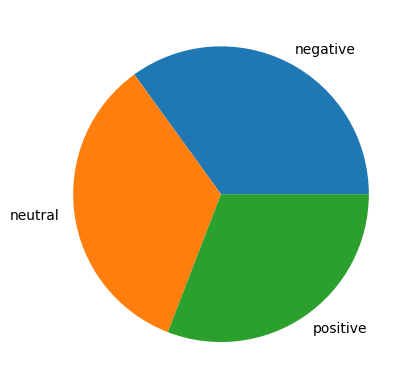

In [35]:
unique_vals, counts = np.unique(y_encoded, return_counts=True)
dt = pd.DataFrame(zip(unique_vals, counts), columns=['Value', 'Count'])
print(dt)

items = dt['Count']

plt.pie(items, labels = encoder.inverse_transform(dt['Value']))
plt.show() 

In [36]:
y_encoded

array([1, 0, 1, ..., 0, 0, 0], shape=(10217,))

In [37]:
list(encoder.inverse_transform(np.unique(y_encoded)))

['negative', 'neutral', 'positive']

In [38]:
X

0        rule no mete about polarizing political topic ...
1        no politics danger now i can make a propaganda...
2                              i am the senate get stabbed
3                                        is this a suicide
4                                                  removed
                               ...                        
10212    a a gen zee who didn cognize einstein hogwash ...
10213    ah the vine era had a boatload of quail mentio...
10214    ah the vine era had a carload of cringe quotat...
10215    ah the vine era had a carload of flinch quote ...
10216    ah the vine era had a carload of wince referen...
Name: processedText, Length: 10217, dtype: object

In [39]:
vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1, 2), max_df=0.9, min_df=5)

x_vect = vectorizer.fit_transform(augmented_dataset['processedText'])

In [40]:
xtrain, xtest, ytrain, ytest = train_test_split(x_vect, y_encoded, test_size=0.2, random_state=42)

In [41]:
print(y.value_counts())

processedSentiment
negative    3574
neutral     3491
positive    3152
Name: count, dtype: int64


In [44]:
model = MultinomialNB()

In [45]:
model.fit(xtrain, ytrain)

MultinomialNB()

In [46]:
ypred = model.predict(xtest)

In [47]:
accuracy_score(ytest, ypred)

0.7142857142857143

In [48]:
cm = confusion_matrix(ytest, ypred)

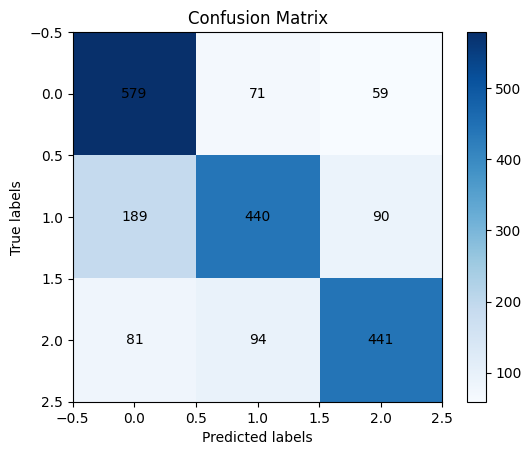

In [49]:
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

# Add labels
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# Add text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.colorbar(im)
plt.show()

In [50]:
caption = "Every day is a fresh start—stay hopeful, stay kind, stay you."
caption_processed = preprocessText(caption)

caption_processed

'every day is a fresh hopeful stay kind stay you'

In [51]:
caption_processed_vect = vectorizer.transform([caption_processed])

caption_processed_vect

<1x4735 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [52]:
ypred = model.predict(caption_processed_vect)

ypred

array([2])

In [53]:
list(encoder.inverse_transform(ypred))

['positive']

In [54]:
! pip install joblib

In [55]:
import joblib

In [56]:
joblib.dump(model, 'sentimentanalyze.pkl')

['sentimentanalyze.pkl']

In [57]:
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [58]:
joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']